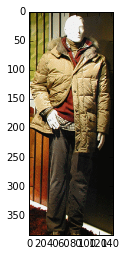

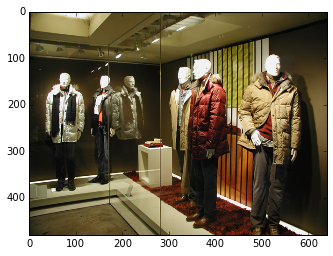

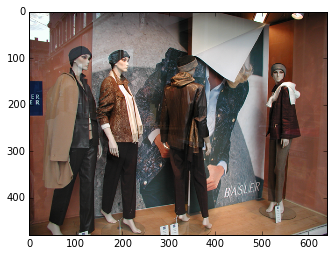

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

def imread(url):
    return cv2.cvtColor(cv2.imread(url), cv2.COLOR_BGR2RGB)

person = imread('person.png')
people = imread('people.png')
people2 = imread('people2.png')

person2 = cv2.imread('person.png')

plt.figure()
plt.imshow(person)
plt.figure()
plt.imshow(people)
plt.figure()
plt.imshow(people2)

## Sobel filter edge detection

In [4]:
# DRAW FUNC
def paint_mats(mats):
    cols = len(mats)

    fig, axs = plt.subplots(
    1,
    cols,
    figsize=(32, 16),
    sharex=True,
    sharey=True)

    i = 0
    try:
        for ax in axs:
            ax.axis('off')
            ax.imshow(mats[i], cmap=plt.cm.gray)
            ax.set_adjustable('box-forced')
            i += 1
    except:
        axs.axis('off')
        axs.imshow(mats[i], cmap=plt.cm.gray)
        axs.set_adjustable('box-forced')
            
    plt.show()

(-0.5, 143.5, 383.5, -0.5)

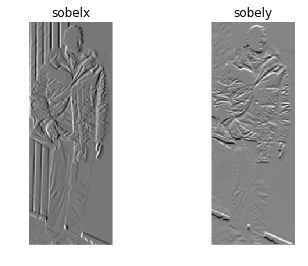

In [5]:
# Sobel
import scipy.ndimage.filters as filters

gray_person = cv2.cvtColor(person, cv2.COLOR_RGB2GRAY)
gray_person_bl = cv2.GaussianBlur(gray_person, (3, 3), 0)

# convolute
sobelx = cv2.Sobel(gray_person_bl, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray_person_bl, cv2.CV_64F, 0, 1, ksize=3)

#plt.imshow(gray_person, cmap=plt.get_cmap('gray'))
fig1, (ax1, ax2) = plt.subplots(
    ncols=2, 
    sharex=True, 
    sharey=True, 
    subplot_kw={'adjustable':'box-forced'})

ax1.imshow(sobelx, cmap=plt.get_cmap('gray'), interpolation='none')
ax1.set_title('sobelx')
ax1.axis('off')

ax2.imshow(sobely, cmap=plt.get_cmap('gray'), interpolation='none')
ax2.set_title('sobely')
ax2.axis('off')

## actually apply sobel

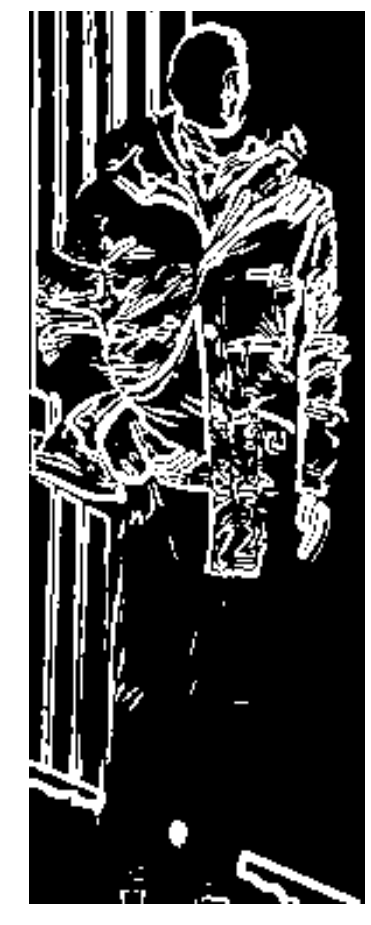

In [6]:
sobelx2 = np.multiply(sobelx, sobelx)
sobely2 = np.multiply(sobely, sobely)

Sob = np.sqrt(np.add(sobelx2, sobely2))

Sob = np.greater(Sob, 140).astype(int)

paint_mats([Sob])

## start with HOGs

In [7]:
from skimage.feature import hog
from skimage import data, color, exposure

image = gray_person.copy()

fd, hog_image = hog(
    image,
    orientations=4,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2), visualise=True)

#paint_mats([image, hog_image_rescaled])

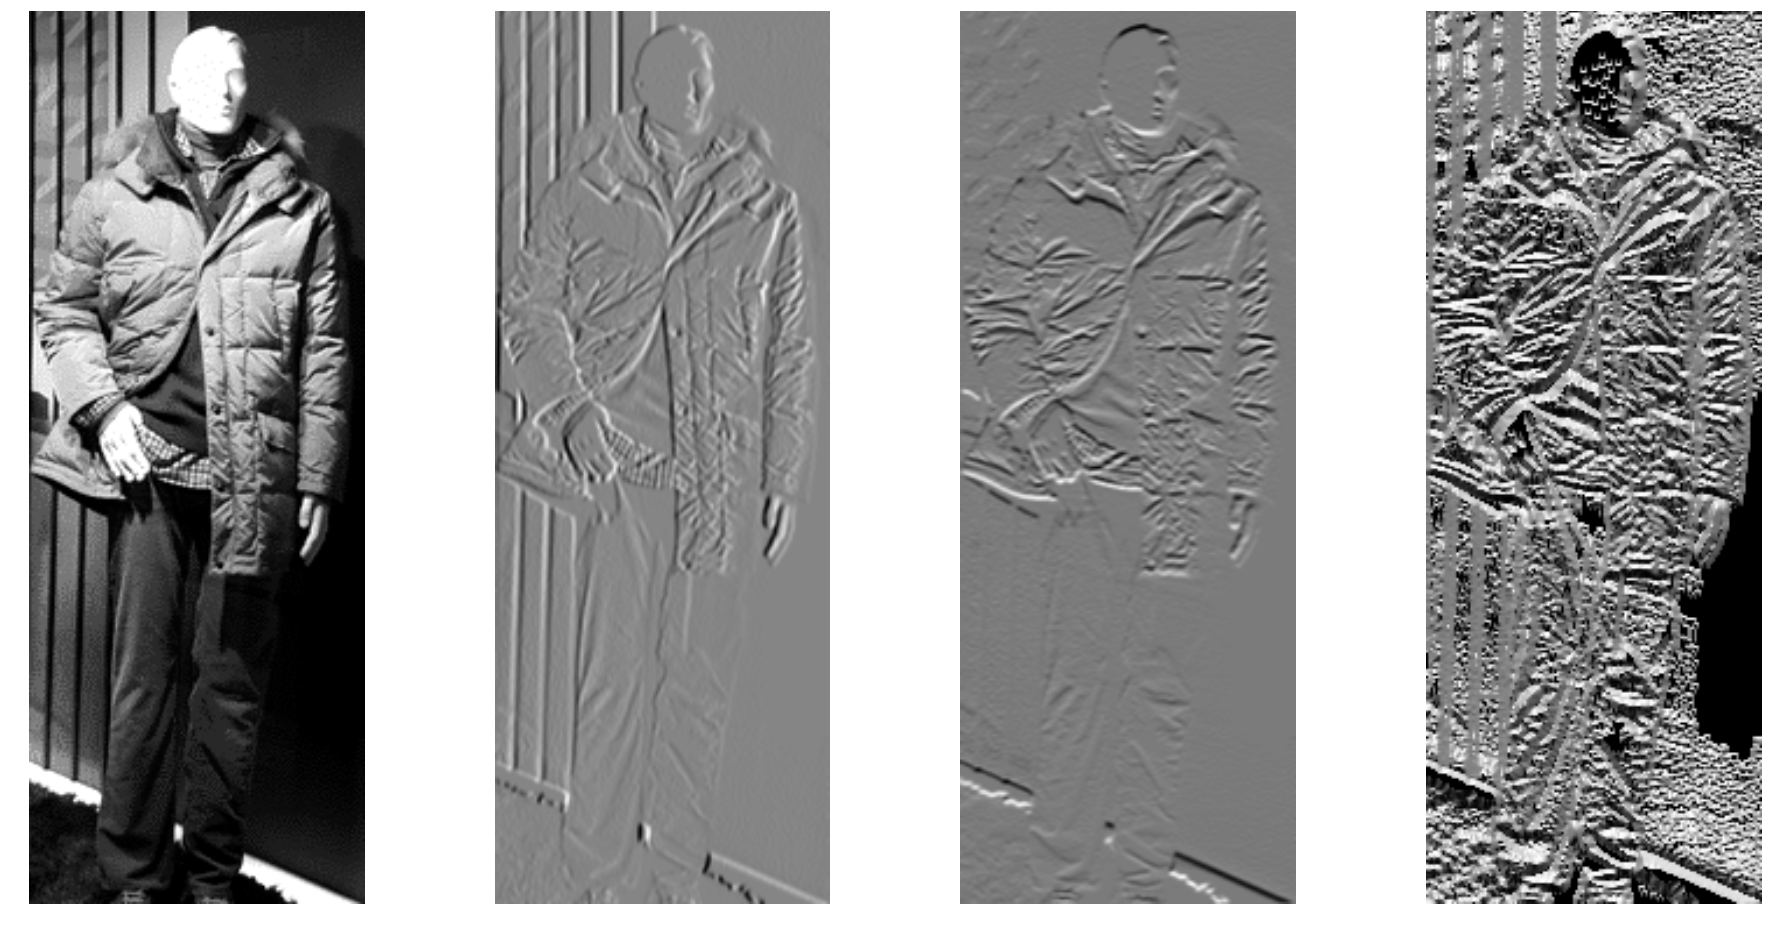

In [8]:
import scipy.ndimage as ndimage

# own hog implementation
image = gray_person.copy().astype(float)
winkel = image

# derivate the image
sob_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=float)
sob_kernel_x = np.transpose(sob_kernel_y)

sob_x = ndimage.convolve(image, sob_kernel_x, mode='nearest')
sob_y = ndimage.convolve(image, sob_kernel_y, mode='nearest')

# direction of gradient
Phi = np.absolute(np.arctan2(sob_x, sob_y))  # dont care abt. direction


paint_mats([image, sob_x, sob_y, Phi])

In [28]:
import math
print(math.pi)

# roi
cell_w = 8
block_h = 16
buckets = 9

single_step = math.pi / buckets

def histo(I, delta_x, delta_y):
    """
    simplified function for a histo as it does not take weights
    into account as described in the paper
    """
    histo = [0] * buckets
    for x in range(block_h):
        for y in range(block_h):
            val = math.floor(I[y + delta_y][x + delta_x]/single_step) - 1
            histo[val] += 1
    return histo

def vec(histo):
    """
    calculate a main direction of the histogram
    0 = 0 - 20 --> 0deg
    1 = 21 - 40 --> 20deg
    2 = 41 - 60 --> 40deg
    3 = 61 - 80 --> 60dg
    4 = 81 - 100 --> 80deg
    5 = 101 - 120 --> 100deg
    6 = 121 - 140 --> 120deg
    7 = 141 - 160 --> 140deg
    8 = 161 - 180 --> 160deg
    """
    vec0 = np.array([0, 1])
    
    pass

for x in range(0, Phi.shape[1] - cell_w, cell_w):
    for y in range(0, Phi.shape[0] - cell_w, cell_w):
        vector = vec(histo(Phi, x, y))
    


3.141592653589793
